In [6]:
from neura_dual_quaternions import DualQuaternion, Quaternion
from DualQuaternionQuinticBlends.LineGenerator import LineGenerator
from DualQuaternionQuinticBlends.ArcGenerator import ArcGenerator
from DualQuaternionQuinticBlends.DQQBTrajectoryGenerator import DQQBTrajectoryGenerator

import numpy as np

%matplotlib widget
import ipywidgets as widgets
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [7]:
# define orientation quaternions for test trajectory
q1 = Quaternion(0.454, -0.891, -0.000, -0.000)
q2 = Quaternion(0.321, -0.630, -0.630, 0.321)
q3 = Quaternion(0.219, -0.219, -0.672, 0.672)
q4 = Quaternion(-0.267, -0.275, -0.847, 0.367)
q5 = Quaternion(-0.367, -0.721, -0.524, -0.267)

# define dual quaternions for linear interpolation
dq1 = DualQuaternion.fromQuatPos(q1, np.array([-0.4, 0, 0]))
dq2 = DualQuaternion.fromQuatPos(q1, np.array([0, 0, 0 ]))
dq3 = DualQuaternion.fromQuatPos(q1, np.array([0, 0, 0 ]))
dq4 = DualQuaternion.fromQuatPos(q1, np.array([0, 0.4, 0 ]))

# define dual quaternions for circular interpolation
dq5 = DualQuaternion.fromQuatPos(q1, np.array([-0.4, 0.4, 0.0]))
dq6 = DualQuaternion.fromQuatPos(q1, np.array([-0.4, 0.4, 0.4]))
dq7 = DualQuaternion.fromQuatPos(q1, np.array([-0.6, 0.3, 0.3]))

# assign dual quaternions to lists
line_DQ_list = [dq1, dq2, dq4, dq5, dq6]
#arc_DQ_list = [dq4, dq5, dq6, dq7]

#line_DQ_list = [dq1, dq2, dq4]
#arc_DQ_list = [dq4, dq5, dq7]

# initialize line and arc generators
line_generator = LineGenerator()
#arc_generator = ArcGenerator()

# define desired cartesian velocites and maximum angular velocity
des_cart_vel_line = 0.3
des_cart_vel_arc = 0.2
max_ang_vel = 2

# generate segments
line_segments = line_generator.generateSegments(line_DQ_list, des_cart_vel_line, max_ang_vel)
#arc_segments = arc_generator.generateSegments(arc_DQ_list, des_cart_vel_arc, max_ang_vel)

# merge segments into one segment list
segments = line_segments #+ arc_segments

In [8]:
# define the acceleration and jerk limits
a_cart_max = 2
j_cart_max = 20
a_ang_max = 5
j_ang_max = 30

# generate trajectory object with the segments defined above
trajectory = DQQBTrajectoryGenerator(segments, a_cart_max, j_cart_max, a_ang_max, j_ang_max)

cnt:  1
cnt:  2
cnt:  3
cnt:  4
cnt:  5
cnt:  6
cnt:  7
cnt:  8
cnt:  9
cnt:  10


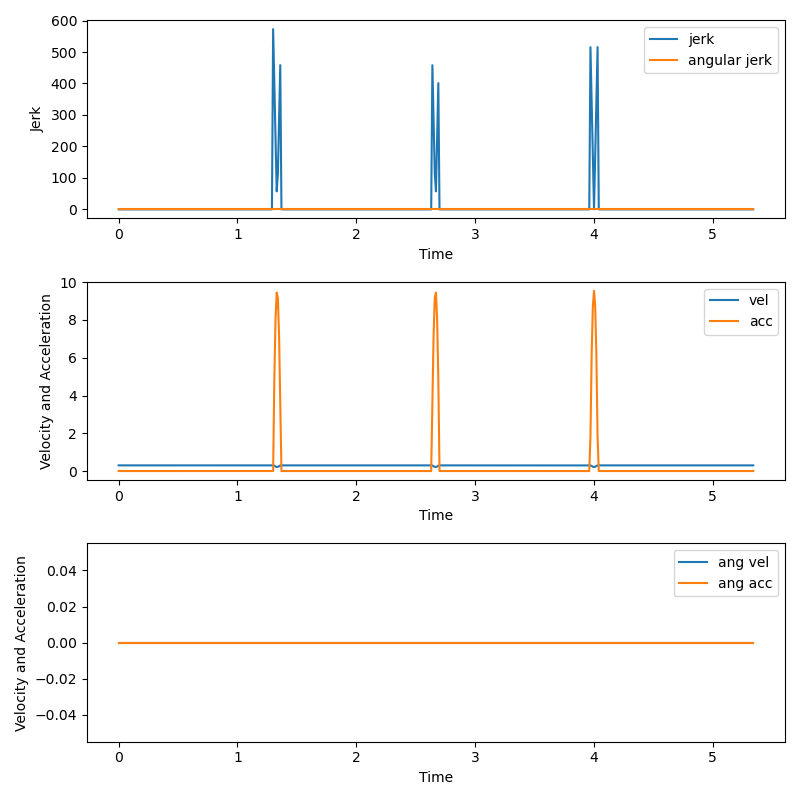

In [9]:
time_vec = np.arange(0, trajectory.time_vector[-1]+0.01, 0.01)

vel_norm_list = []
acc_norm_list = []
jerk_norm_list = []

ang_vel_norm_list = []
ang_acc_norm_list = []
ang_jerk_norm_list = []

quaternion_list = []

x = []
y = []
z = []

for t in time_vec:
    
    pos, vel, acc, jerk, quaternion, ang_vel, ang_acc, ang_jerk = trajectory.evaluate(t)
    
    vel_norm_list.append(np.linalg.norm(vel))
    acc_norm_list.append(np.linalg.norm(acc))
    jerk_norm_list.append(np.linalg.norm(jerk))
    
    ang_vel_norm_list.append(np.linalg.norm(ang_vel))
    ang_acc_norm_list.append(np.linalg.norm(ang_acc))
    ang_jerk_norm_list.append(np.linalg.norm(ang_jerk))
    
    quaternion_list.append(quaternion)
    
    x.append(pos[0])
    y.append(pos[1])
    z.append(pos[2])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

ax1.plot(time_vec, jerk_norm_list, label = "jerk")
ax1.plot(time_vec, ang_jerk_norm_list, label = "angular jerk")
ax1.set_xlabel('Time')
ax1.set_ylabel('Jerk')
ax1.legend()

ax2.plot(time_vec, vel_norm_list, label = "vel")
ax2.plot(time_vec, acc_norm_list, label = "acc")
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity and Acceleration')
ax2.legend()

ax3.plot(time_vec, ang_vel_norm_list, label = "ang vel")
ax3.plot(time_vec, ang_acc_norm_list, label = "ang acc")
ax3.set_xlabel('Time')
ax3.set_ylabel('Velocity and Acceleration')
ax3.legend()

# # Adjust the layout and display the plot
plt.tight_layout()
plt.show()

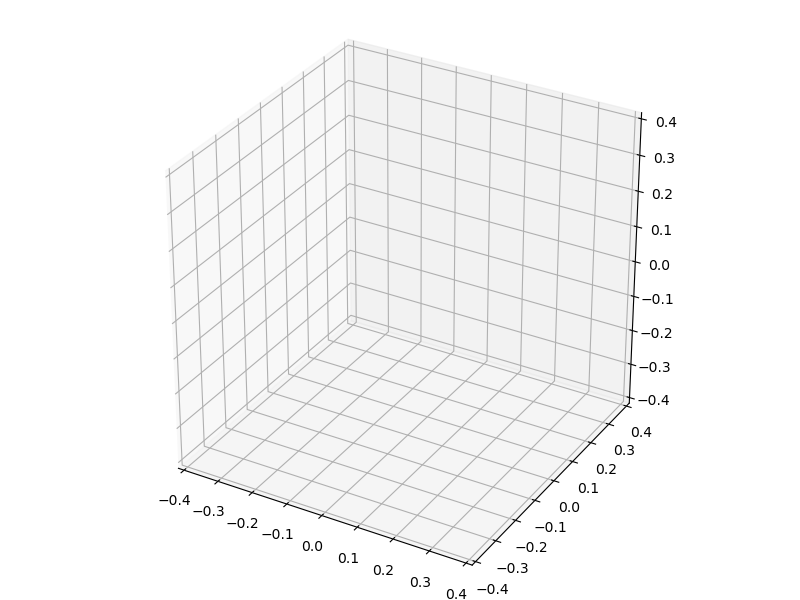

In [10]:
# Create a new figure for the 3D plot
fig_3d = plt.figure(figsize=(8, 6))

# Create 3D axes
ax_3d = fig_3d.add_subplot(111, projection='3d')
fig_3d.canvas.header_visible = False
size = 0.4
ax_3d.set_xlim([-size, size])
ax_3d.set_ylim([-size, size])
ax_3d.set_zlim([-size, size])
ax_3d.set_box_aspect([1, 1, 1])
plt.tight_layout()
# Define the update function for the animation
def update(frame):
    ax_3d.cla()  # Clear the previous plot
    ax_3d.set_xlim([-size, size])
    ax_3d.set_ylim([-size, size])
    ax_3d.set_zlim([-size, size])
    ax_3d.set_box_aspect([1, 1, 1])
    ax_3d.set_facecolor('white')
    ax_3d.set_axis_off()
    for spine in ax_3d.spines.values():
        spine.set_visible(False)
        
    # Draw the trajectory
    ax_3d.plot(x, y, z, label='Trajectory')
    
    # Draw the dot at the current position
    #ax_3d.scatter(x[frame], y[frame], z[frame], color='red')
    
    R = quaternion_list[frame].asRotationMatrix()*0.15
    # Draw coordinate frame (quiver arrows)
    #x_axis = ax.quiver(*start_point, *R[:,0], arrow_length_ratio = 0.1, linewidth = 1, color='r')
    ax_3d.quiver(x[frame], y[frame], z[frame], *R[:,0], color='red', label='X')
    ax_3d.quiver(x[frame], y[frame], z[frame], *R[:,1], color='green', label='Y')
    ax_3d.quiver(x[frame], y[frame], z[frame], *R[:,2], color='blue', label='Z')
    
    # Set labels and legend
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.legend()

# Create the FuncAnimation object with a smaller interval for faster animation
ani = animation.FuncAnimation(fig_3d, update, frames=len(x), repeat=False, interval=0.01)

# Display the animation
plt.show()